# TFM - Análisis en profundidad y Machine Learning para establecer el precio adecuado en Airbnb

# 1. Importación del dataset y visualización inicial

## 1.1 Importación Listing

La primera fase para analizar los datos es importarlos correctamente. He establecido un file path de los 5 csv para el proyecto. Establecemos el dataset con el nombre XY. El nombre no es realmente relevante, pero para una organización clara de los datos, posteriormente dividimos la variable de estudio como Y, mientras que el resto de variable restantes serán X y esta clasificación puede ayudar a un fácil entendimiento de los procesos. Mostramos las 5 primeras filas para asegurarnos de que los datos se han importado correctamente.

In [1]:
# En primer lugar se importa la libería pandas, que es especialmente útil para el tratamiento de Dataframes ya que permite leer y escribir entre otros en el formato CSV.
import pandas as pd

# Se establece el file path, ya que los datos están descargados en directorio personal.
file_paths = {
    'Hawaii': r'C:\Users\edybl\Desktop\TFM Data\All USA Listings\Hawaii Listings.csv',
    'Los Angeles': r'C:\Users\edybl\Desktop\TFM Data\All USA Listings\Los Angeles Listings.csv',
    'New York City': r'C:\Users\edybl\Desktop\TFM Data\All USA Listings\New York City Listings.csv',
    'Rhode Island': r'C:\Users\edybl\Desktop\TFM Data\All USA Listings\Rhode Island Listings.csv',
    'Seattle': r'C:\Users\edybl\Desktop\TFM Data\All USA Listings\Seattle Listings.csv',
}

# Se establece una lista para almacenar los dataframes
Dataframes = []

# Ahora podemos cargamos cada uno de los dataframes. Podemos añadir además una columna que vamos a denominar 'location' y tiene en cuenta el lugar de origen de los datos (Que se ha establecido al denominar la ruta).
# Al ser archivos muy pesados agregamos low_memory 
for location, file_path in file_paths.items():
    df = pd.read_csv(file_path, low_memory=False) 
    df['location'] = location
    Dataframes.append(df)

# Por último se concatenan los datos para establecer un solo Dataframe con los 5 CSV incluidos.
XY = pd.concat(Dataframes, ignore_index=True)
print(XY.head())

                   id                                      listing_url  \
0  822170245153601161  https://www.airbnb.com/rooms/822170245153601161   
1            24382028            https://www.airbnb.com/rooms/24382028   
2            19037646            https://www.airbnb.com/rooms/19037646   
3             1920293             https://www.airbnb.com/rooms/1920293   
4            51204529            https://www.airbnb.com/rooms/51204529   

        scrape_id last_scraped           source  \
0  20230316044204   2023-03-17      city scrape   
1  20230316044204   2023-03-16      city scrape   
2  20230316044204   2023-03-17      city scrape   
3  20230316044204   2023-03-17      city scrape   
4  20230316044204   2023-03-17  previous scrape   

                                                name  \
0  Peaceful Retreat W/Private Lanai & A/C-Aloha Surf   
1                                      Rusty Sunrise   
2   Great $Value$ | 2 block to Waikiki Beach | KV-6F   
3  Pacific Shores-Ocean 

Se puede apreciar como los datos están en primera instancia bien importados, pero hay muchas variables en el modelo por lo que no se muestran todas. También podemos ver la columna location añadida como última columna del Dataframe. Vamos a analizar mediante format las characteristics del dataframe.

In [2]:
print(u'- Número de filas: {}'.format(XY.shape[0]))
print(u'- Número de columnas: {}'.format(XY.shape[1]))
print(u'- Lista de variables: {}'.format(list(XY.columns)))

- Número de filas: 127260
- Número de columnas: 76
- Lista de variables: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availabil

El Dataframe presenta una gran cantidad de datos, si son útiles y están correctamente registrados son indicativo de una buena base para poder realizar el análisis datos. No obstante, una cantidad excesiva de información imprecisa ya sea en respecto a cantidades, datos nulos, faltantes o de formato puede dar a un diagnóstico erróneo, por lo que habrá que decidir que variables son realmente útiles para el análisis.

Dado que disponemos de la columna ID, vamos a eliminar duplicados para asegurarnos que no vician el análisis.

In [3]:
duplicated_ids = XY.duplicated(subset=['id']).sum()
print(f"Total de IDs duplicados: {duplicated_ids}")

Total de IDs duplicados: 0


Confirmamos que el dataframe no tiene datos duplicados así que procedemos a tratar las variables.

## 1.2 Eliminación inicial de variables

Al tener el dataframe muchas variables es posible que muchas de ellas no sean útiles para el mismo. La siguiente tabla presenta una descripción muy breve del motivo del descarte tanto por motivos justificativos del modelo como para entender por qué una variable puede no ser relevante por sus características como dato. 

•	ID: Una vez que hemos comprobado que no están duplicados son irrelevantes ya que no nos dan información.

•	Datos del scrap (listing_url, scrape_id, last_scraped. source): Son datos del scrap, nos sirven a los analistas para conocer datos del scraping como el origen de los datos y la fecha, pero no otorga datos para el análisis.

•	Descripciones (name, description, neighborhood_overview): Son contienen texto genérico y variable, es difícilmente clasificable ya que usan redacción humana y subjetiva para describir la propiedad.

•	Datos del host (picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, 'host_has_profile_pic, host_identity_verified, neighbourhood). Son datos sobre el anfitrión, en general no tienen por qué afectar al precio de la vivienda, y la mayoría de ellos el cliente que utilice la aplicación no sabría introducirlos ya que no tiene por qué saber la mayoría de sus características propias o si hará acciones como ponerse una foto de perfil. Estas variables pueden ser útiles para estudiar el tipo de host respecto a la satisfacción para recomendar optimizar por ejemplo el tiempo de respuesta o usar foto de perfil, pero no es definitorio para el precio. En un modelo previo se ha intentado tener en cuenta el por ejemplo host response rate pero su correlación de Pearson con respecto al precio era muy cercano a 0.

•	Coordenadas (Latitude, longitude) Viene dada la ubicación, es una variable que podría ser útil, no obstante, el cliente no es viable utilizarlo para el modelo. El cliente desconoce sus coordenadas para introducirlas, por lo que tendríamos que saber cómo las asigna según la calle y número del cliente, necesitaríamos un mapa con las direcciones y coordenadas en mapa para la transición y que coincidiese como presenta los casos Airbnb.

•	Días de acceso (minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm): Son variables respecto a al número máximo y mínimo de noches. Estas se incluyen en el modelo, el resto son datos dependiendo del historial de la vivienda, por lo que los valores básicos de mínimo y máximo de días establecidos por el cliente son suficientes.

•	Disponibilidad (calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scrape). Son los días que estará disponible la vivienda a corto, medio y largo plazo según las reservas ya realizadas. Como el cliente aún no tiene reservas no es un valor que pueda introducir para determinar el precio.

•	Variables características ('property_type', 'neighbourhood_cleansed') estas variables presentan una categorización mayor respecto al tipo de propiedad y el barrio en el que se encuentra. Son variables muy útiles que implican la introducción de decenas de variables estilo dummie en el modelo. Estas se han aplicado en el modelo, pero con la cantidad de datos disponibles actualmente no son beneficiosas para el modelo. Esto es debido a que por ejemplo puede haber un barrio con solo 3 viviendas en él que vicia las predicciones de una forma muy concreta y en general reduce la capacidad predictiva del modelo, presentando un R2 menor al introducirse y reduciendo su capacidad de predicción. En caso de disponer de un dataframe más amplio, por ejemplo, añadiendo nuevas viviendas a lo largo del tiempo mientras se tiene en cuenta la temporalidad, estas variables mejorarían el modelo, pero no es el caso para este proyecto.

•	Reviews: (number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms,'reviews_per_month). Son datos referentes a la puntuación del sitio, al ser una nueva vivienda aún no ha sido valorada por lo usuarios.


In [4]:
# Listado de columnas a eliminar
columnas_borrar = [
    'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview',
    'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 
    'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 
    'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 
    'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 
    'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
    'calculated_host_listings_count_shared_rooms', 'bathrooms','reviews_per_month','latitude','longitude', 'property_type', 'neighbourhood_cleansed'   
]

# Se eliminan todas las variables de la lista
XY = XY.drop(columns=columnas_borrar)

# Vericamos las columnas actuales
print(XY.head())
print("Columnas después de eliminar:", len(XY.columns))

  neighbourhood_group_cleansed        room_type  accommodates bathrooms_text  \
0                     Honolulu  Entire home/apt             3         1 bath   
1                        Kauai  Entire home/apt            10        4 baths   
2                     Honolulu  Entire home/apt             2         1 bath   
3                         Maui  Entire home/apt             6        2 baths   
4                       Hawaii     Private room             2  1 shared bath   

   bedrooms  beds                                          amenities    price  \
0       NaN   2.0  ["Microwave", "Coffee maker", "Hair dryer", "T...  $103.00   
1       4.0   4.0  ["Microwave", "Free parking on premises", "Hai...  $542.00   
2       NaN   1.0  ["Lockbox", "Free street parking", "TV", "Smok...  $109.00   
3       2.0   3.0  ["Baking sheet", "Toaster", "Ethernet connecti...  $265.00   
4       1.0   NaN  ["Hair dryer", "Essentials", "Hangers", "Shamp...  $180.00   

   minimum_nights  maximum_night

Tenemos un total de 11 variables restantes. Vamos a ver que valores presentan y por qué son útiles para el modelo

- location: Es el territorio que en el que se han recopilado los datos del dataframe. En este caso son Hawaii, Los Angeles, New York, Rhode Island y Seattle. Estos dataframes no incluyen solo la capital del estado si no que también otras grandes ciudades en estos.
  
- neighbourhood_group_cleansed: Contiene la ciudad concreta dentro de la localización. Es importante puntualizar que en el contexto de estados unidos estas ciudades son colindantes así que presentan distintas características, funcionando de forma similar a barrios. Por ejemplo New York distingue Brooklyn, Staten Island, Bronx, Queens y Manhattan. Todas colindantes y con una gran densidad de población.
  
- room_type: Distingue entre casas completas, habitaciones privadas, habitaciones compartidas o habitaciones de hotel.
  
- accommodates: Es el número de huéspedes para los que está preparada la instalación.
  
- bathrooms_text: Incluye el número y tipo de baños presentes.
  
- bedrooms: Es la suma de habitaciones disponibles.
  
- bed: Son la cantidad de camas que hay el sitio. Importante puntualizar que no coincide con el número de accommodates ya que puede haber camas dobles en la propiedad.

- amenities: Es la lista de comodidades presentes en la instalación.

- price: Precio por noche establecido para la vivienda.

- minimum_nights: Es la cantidad mínima de noches que se permite el alquiler.

- maximum_nights: Es la cantidad máxima de noches que se permite el alquiler.


Revisamos como están categorizadas las variables para su tratamiento. 

In [5]:
XY_types = XY.dtypes
print(XY_types)

neighbourhood_group_cleansed     object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object
price                            object
minimum_nights                    int64
maximum_nights                    int64
location                         object
dtype: object


Aquí podeos ver el primer indicativo de que es necesario tratar las variables para su uso correcto. Por ejemplo, nuestra variable objetivo, el precio, está catalogada como objeto, por lo tanto es reconocido como una columna con texto y no numérica.

Miramos los valores de las variables numéricas a fin de obtener una idea general de los datos posibles e identificar posibles outliers, asunto que trataremos próximamente.

In [6]:
XY.describe()

,accommodates,bedrooms,beds,minimum_nights,maximum_nights
count,127260.000000,115058.000000,125200.000000,127260.000000,1.272600e+05
mean,3.854220,1.676215,2.123458,15.231966,1.772405e+04
std,2.606521,1.059384,1.535405,27.862121,6.020345e+06
min,0.000000,1.000000,1.000000,1.000000,1.000000e+00
25%,2.000000,1.000000,1.000000,2.000000,6.000000e+01
50%,3.000000,1.000000,2.000000,4.000000,3.650000e+02
75%,5.000000,2.000000,3.000000,30.000000,1.125000e+03
max,16.000000,24.000000,50.000000,1250.000000,2.147484e+09


In [7]:
obj_cols = XY.select_dtypes(include=['object']).columns
for col in obj_cols:
    print(col, ":", XY[col].unique())

neighbourhood_group_cleansed : ['Honolulu' 'Kauai' 'Maui' 'Hawaii' 'Unincorporated Areas' 'Other Cities'
 'City of Los Angeles' 'Brooklyn' 'Staten Island' 'Bronx' 'Queens'
 'Manhattan' 'Providence' 'Newport' 'Kent' 'Washington' 'Bristol'
 'Other neighborhoods' 'West Seattle' 'Ballard' 'Cascade' 'Capitol Hill'
 'Queen Anne' 'Rainier Valley' 'Magnolia' 'Beacon Hill' 'Downtown'
 'Lake City' 'Central Area' 'University District' 'Delridge' 'Northgate'
 'Seward Park' 'Interbay']
room_type : ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
bathrooms_text : ['1 bath' '4 baths' '2 baths' '1 shared bath' 'Half-bath' '1 private bath'
 '3 baths' '1.5 shared baths' '2.5 baths' '1.5 baths' '5.5 baths'
 '3.5 baths' '0 shared baths' '0 baths' '11 baths' '2 shared baths'
 '4.5 baths' nan '4 shared baths' 'Private half-bath' '6 baths'
 '6.5 baths' '3 shared baths' '4.5 shared baths' '5 baths' '7.5 baths'
 '8 baths' '12 baths' '14 baths' 'Shared half-bath' '13 baths'
 '3.5 shared baths' '2.5

Hay ciertos datos que llaman la atención.
Encontramos problemas en el precio ya que por el símbolo del dolar está detectando miles de valores de texto aislados.
Los baños vienen dados como texto por una parte número y por otra tipo.
Los amenities son cadenas de texto que concatenan distintos comodidades en la propiedad.
Vamos a tratar estas variables para que sean correctamente utilizables.

Realizamos una primera limpieza de valores nulos antes de tratar las variables. Esto se hace ya que por ejemplo, podemos querer transformar una variable de texto en numérica, o como dummies pero presentar valores rompen la regla utilizada para su tratamiento.

In [8]:
XY.isnull().sum()

neighbourhood_group_cleansed        0
room_type                           0
accommodates                        0
bathrooms_text                    147
bedrooms                        12202
beds                             2060
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
location                            0
dtype: int64

Podemos confirmar que hay valores nulos, especialmente respecto a los dormitorioss. Es importante eliminar los mismos, ya que además el número de dormitorios es una variable fundamental para determinar el precio.

In [9]:
XY = XY.dropna()
XY.isnull().sum()

neighbourhood_group_cleansed    0
room_type                       0
accommodates                    0
bathrooms_text                  0
bedrooms                        0
beds                            0
amenities                       0
price                           0
minimum_nights                  0
maximum_nights                  0
location                        0
dtype: int64

Ahora que hemos podido comprobar que no hay valores nulos, procedemos a tratar las variables para su correcto uso.

# 2. Transformación de variables

## 2.1 Transformar Precio

El precio viene dado como una variable objeto ya que además de la cifra, tiene el símbolo del $ por lo que debemos eliminarlo y establecer la variable como una numérica, en este caso un número enero. Generalmente los precios se dan como números no enteros el tener decimales, pero Airbnb no permite establecer centavos.

Para ello reemplazaremos el símbolo del $ por un valor en blanco, y predeterminaremos el tipo de variable. Para ello utilizamos np, una función de la liberaría NumPy que otorga herramientas para el tratamiento y cálculo numérico.

In [10]:
import numpy as np
XY['price'] = XY['price'].replace('[\$,]', '', regex=True).astype(float)
XY['price'] = XY['price'].astype(np.int64)
print(XY['price'].head())

1     542
3     265
7     499
9      96
10    403
Name: price, dtype: int64


Podemos verificar que se ha establecido el precio correctamente como un numero entero.

## 2.2 Transformar Amenities

Los "Amenities" son las comodidades que presenta la propiedad. Esta es una variable que puede ser muy relevante para determinar el precio, al fin y al cabo todo el valor añadido para una buena estancia es valorable. El problema para el tratamiento de esta variable es que tiene muchos valores posibles, ya que la lista de posibles valores es muy amplia. Vamos a comprobarlo a continuación.

Posteriormente comprobaremos como estos tienen correlación con el precio relevante, no obstante presentan un problema y es vienen dado como una concatenación de texto con muchos valores posibles.

In [11]:
# Importamos ast, un módulo que ayuda al tratamiento de árboles sintácticos. 
# Importamos además counter, que permite contar elementos concretos entre los datos.
import ast
from collections import Counter

# Convertimos la cadena de texto en una lista y la aplicamos a la variable amenities.
def parse_amenities(amenities_str):
    return ast.literal_eval(amenities_str)
XY['amenities'] = XY['amenities'].apply(parse_amenities)

# Obtenemos una lista de todas las amenities contando el número de veces que aparece cada una.
all_amenities = [item for sublist in XY['amenities'] for item in sublist]
amenities_counter = Counter(all_amenities)

# Establecemos el conteo como dataframe y lo ordenamos de forma descedente para ver los valores que más aparecen.
amenities_df = pd.DataFrame(amenities_counter.items(), columns=['Amenity', 'Count'])
amenities_df = amenities_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print("Conteo de todas las amenities:")
print(amenities_df)

Conteo de todas las amenities:
                                                 Amenity   Count
0                                            Smoke alarm  104416
1                                                   Wifi  103942
2                                                Kitchen  101890
3                                             Essentials   96227
4                                                Hangers   86601
...                                                  ...     ...
20102  55" HDTV with HBO Max, Apple TV, Hulu, Disney+...       1
20103                    65" TV with Roku, Netflix, Hulu       1
20104               Smeg stainless steel induction stove       1
20105  65" HDTV with Roku, Amazon Prime Video, Disney...       1
20106  HDTV with Amazon Prime Video, HBO Max, Hulu, N...       1

[20107 rows x 2 columns]


Podemos confirmar que hay más de 20107 valores independientes, muchos de ellos individuales. Tras un tratamiento variado de estas variables, he determinado que la mejor manera de mantener su relevancia con su limitado tratamiento que tampoco puede colapsar el modelo de variables es por un lado establecer amenities más comunes, ya que son las que más datos presentan y a su vez, son fácilmente intraducibles por el cliente. Y por otro lado para no eliminar el resto de amenities sin relevancia, sumar el total de amenities en cada dato, ya que, de forma generalizada, un mayor número total de amenities es un mayor número de prestaciones para la vivienda.

In [12]:
# Establecemos las 20 amenities más frecuentes
top_20_amenities = [amenity for amenity, count in amenities_counter.most_common(20)]
for amenity in top_20_amenities:
    count = amenities_counter[amenity]
    print(f"{amenity}: {count} veces")

Smoke alarm: 104416 veces
Wifi: 103942 veces
Kitchen: 101890 veces
Essentials: 96227 veces
Hangers: 86601 veces
Carbon monoxide alarm: 84343 veces
Hair dryer: 84262 veces
Iron: 79725 veces
Hot water: 79415 veces
Dishes and silverware: 76350 veces
Refrigerator: 74031 veces
Shampoo: 72698 veces
Microwave: 70914 veces
Cooking basics: 68329 veces
Bed linens: 67194 veces
Fire extinguisher: 66464 veces
Air conditioning: 65226 veces
Heating: 61946 veces
First aid kit: 55835 veces
Self check-in: 55505 veces


Para dejar estas variables correctamente establecidas sin necesitar más tratamiento posterior, vamos a establecerlas como dummies, de forma que si la vivienda presenta la comodidad presente un 1 y en caso de no disponer de ella un 0.

In [13]:
for amenity in top_20_amenities:
    XY[amenity] = XY['amenities'].apply(lambda x: 1 if amenity in x else 0)
for amenity in top_20_amenities:
    print(f"{amenity}:")
    print(XY[amenity].head())
    print()

Smoke alarm:
1     0
3     1
7     0
9     1
10    1
Name: Smoke alarm, dtype: int64

Wifi:
1     1
3     1
7     1
9     1
10    0
Name: Wifi, dtype: int64

Kitchen:
1     1
3     1
7     1
9     1
10    1
Name: Kitchen, dtype: int64

Essentials:
1     1
3     1
7     0
9     1
10    0
Name: Essentials, dtype: int64

Hangers:
1     0
3     1
7     0
9     1
10    0
Name: Hangers, dtype: int64

Carbon monoxide alarm:
1     0
3     1
7     0
9     1
10    0
Name: Carbon monoxide alarm, dtype: int64

Hair dryer:
1     1
3     1
7     0
9     1
10    0
Name: Hair dryer, dtype: int64

Iron:
1     0
3     1
7     0
9     1
10    1
Name: Iron, dtype: int64

Hot water:
1     0
3     1
7     0
9     0
10    0
Name: Hot water, dtype: int64

Dishes and silverware:
1     1
3     1
7     0
9     0
10    0
Name: Dishes and silverware, dtype: int64

Refrigerator:
1     1
3     1
7     0
9     0
10    0
Name: Refrigerator, dtype: int64

Shampoo:
1     0
3     1
7     0
9     1
10    0
Name: Shampoo, 

Ahora vamos a crear la variable del total de amenities, separando el texto por su delimitante y contando el número de valores

In [14]:
# Creamos la columna 'total_amenities' que contiene el número total de amenities para cada fila, obtenido mediante len.
XY['total_amenities'] = XY['amenities'].apply(len)
print(XY['total_amenities'])

1         19
3         65
7         12
9         16
10        11
          ..
127255    54
127256    41
127257    44
127258    11
127259    51
Name: total_amenities, Length: 113382, dtype: int64


Ahora tenemos las variables más comunes como dummies y la suma de amenities totales como valor numérico, por lo que podemos eliminar la columna original de amenities que es puro texto sin tratamiento.

Podemos eliminar la columna original amenities ya que como texto sin tratar ya no tiene ningún valor para el modelo.

In [15]:
XY = XY.drop('amenities', axis=1)

## 2.3 Transformar Baños

Estudiamos los posibles valores para su tratamiento.

In [16]:
valores_posibles = XY['bathrooms_text'].unique()
print("Valores posibles de bathrooms_text:")
print(valores_posibles)

Valores posibles de bathrooms_text:
['4 baths' '2 baths' '1 bath' '3 baths' '1.5 shared baths' '2.5 baths'
 '1.5 baths' '5.5 baths' '3.5 baths' '1 shared bath' '0 shared baths'
 'Half-bath' '1 private bath' '0 baths' '11 baths' '2 shared baths'
 '4.5 baths' '4 shared baths' '6 baths' '6.5 baths' '3 shared baths'
 '4.5 shared baths' '5 baths' '7.5 baths' '8 baths' '14 baths' '13 baths'
 '3.5 shared baths' 'Shared half-bath' '2.5 shared baths' '8.5 baths'
 '7 baths' '6.5 shared baths' 'Private half-bath' '9 baths' '22 baths'
 '10 shared baths' '10 baths' '9.5 baths' '10.5 baths' '12 baths'
 '8 shared baths' '11 shared baths' '11.5 baths' '5 shared baths'
 '8.5 shared baths' '5.5 shared baths' '21.5 baths' '13.5 baths'
 '21 baths' '20 baths' '12.5 baths' '15 baths' '11.5 shared baths'
 '6 shared baths' '15.5 baths' '16 shared baths']


La variable baños se presentan como número más texto. En general nos podemos referir a:
- bath: Baño genérico, sin concretar.
- shared bath: Si se comparte con más huéspedes.
- Private bath: Si es exclusivo para el arrendador.
- half-bath: Cuando es un baño simple, generalmente pequeño con solo inodoro y pileta. Esto explica la existencia de valores decimales, ya que en Airbnb los half bath toman un valor decimal de 0.5

Podemos pues dividir por la variable para obtener dos nuevas. Por un lado una variable objeto categórica que distinga el tipo de baño o baños y por otra el número total de los mismos.

In [17]:
# Importamos re que funciona para buscar patrones en cadenas de texto.
import re

# Definimos la función para extraer por un lado el texto y por otro el número.
# Encontramos números en el texto, los separamos del mismo y eliminamos los números en el texto.
def extraer_numero_baños(texto):
    numero = re.findall(r'(\d+(\.\d+)?)', texto) 
    num_baños = float(numero[0][0]) if numero else 1 
    texto_limpio = re.sub(r'\d+(\.\d+)?', '', texto) 
    return num_baños, texto_limpio
    
# Aplicamos la función definida a la columna, distinguiendo el número de baños y el texto ya limpiado.
# Eliminamos la columna de bathrooms_text ya que el texto sin tratar no nos es de interés.
XY['num_bathrooms'], XY['bathrooms_text_clean'] = zip(*XY['bathrooms_text'].apply(extraer_numero_baños))
XY.drop(columns=['bathrooms_text'], inplace=True)
print(XY[['num_bathrooms', 'bathrooms_text_clean']])

        num_bathrooms bathrooms_text_clean
1                 4.0                baths
3                 2.0                baths
7                 2.0                baths
9                 1.0                 bath
10                3.0                baths
...               ...                  ...
127255            1.0                 bath
127256            1.0          shared bath
127257            1.0                 bath
127258            1.0                 bath
127259            1.5                baths

[113382 rows x 2 columns]


Hemos creado una nueva variable numérica y objeto. Es importante revisar que categorías existen ahora como objeto para asegurarnos de que son correctas y no crear dummies de más próximamente. Para ello recopilamos los valores únicos.

In [18]:
valores_unicos = XY['bathrooms_text_clean'].unique()
print(valores_unicos)

[' baths' ' bath' ' shared baths' ' shared bath' 'Half-bath'
 ' private bath' 'Shared half-bath' 'Private half-bath']


Como podemos apreciar el texto distingue en singlar y plural el tipo de baño. Esto no es necesario ya que el número de baños viene establecido por la nueva variable que los cuantifica, por lo que vamos a establecer las categorías en plural como su equivalente en singlar.

In [19]:
XY['bathrooms_text_clean'] = XY['bathrooms_text_clean'].replace({' shared baths': ' baths'})
XY['bathrooms_text_clean'] = XY['bathrooms_text_clean'].replace({' baths': ' bath'})
valores_unicos_actualizados = XY['bathrooms_text_clean'].unique()
print(valores_unicos_actualizados)

[' bath' ' shared bath' 'Half-bath' ' private bath' 'Shared half-bath'
 'Private half-bath']


## 2.4 Convertir las categóricas como numéricas

Al enternar modelos de aprendizaje auttomático, y dado que nuestro objetivo es establecer un via machine learning un modelo para los datos, es importante que las variables tipo object, tengan un valor numérico. Esto es debido a que los alrgoritmos necesitan entradas numéricas. 

En primer lugar vamos a analizar las posibles categorías de las variables objeto. Establecemos una lista de la smismas para su análisis, mirando sus posibles valores independientes.

In [20]:
object_columns = [ 'neighbourhood_group_cleansed', 'room_type', 'bathrooms_text_clean', 'location']
for column in object_columns:
    print(f"Valores únicos en '{column}':")
    print(XY[column].unique())
    print("\n")

Valores únicos en 'neighbourhood_group_cleansed':
['Kauai' 'Maui' 'Honolulu' 'Hawaii' 'Unincorporated Areas' 'Other Cities'
 'City of Los Angeles' 'Brooklyn' 'Staten Island' 'Bronx' 'Queens'
 'Manhattan' 'Providence' 'Newport' 'Kent' 'Washington' 'Bristol'
 'Other neighborhoods' 'West Seattle' 'Ballard' 'Cascade' 'Capitol Hill'
 'Queen Anne' 'Rainier Valley' 'Magnolia' 'Beacon Hill' 'Downtown'
 'Lake City' 'Central Area' 'University District' 'Delridge' 'Northgate'
 'Interbay' 'Seward Park']


Valores únicos en 'room_type':
['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


Valores únicos en 'bathrooms_text_clean':
[' bath' ' shared bath' 'Half-bath' ' private bath' 'Shared half-bath'
 'Private half-bath']


Valores únicos en 'location':
['Hawaii' 'Los Angeles' 'New York City' 'Rhode Island' 'Seattle']




Podemos apreciar como los valores tienen sentido, están tratados y son relevantes sin incurrir en un gran número de variables tipo dummy. Es importante puntualizar que los valores de neighborhood_group_cleansed dependen del valor previo de location, ya que cada uno es exclusivo de una localización concreta. Esto se tendrá en cuenta en la ejecución del modelo.

Tomamos pues dummies, esto creará una nueva variable para cada posible categoría y establecerá el valor 1 si está presente y el valor 0 si no. Estas son exclusivas las unas de las otras por lo que un dato solo tendrá un valor para un tipo de neighbourhood, room type, bathroom y location.

In [21]:
columnas_dummy = ['neighbourhood_group_cleansed', 'room_type', 'bathrooms_text_clean', 'location']
XY = pd.get_dummies(XY, columns=columnas_dummy, drop_first=False)
XY.replace({False: 0, True: 1}, inplace=True)
print(XY.head())

    accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
1             10       4.0   4.0    542               1            1125   
3              6       2.0   3.0    265               3            1125   
7              4       1.0   2.0    499             180             365   
9              2       1.0   1.0     96               1            1125   
10             6       2.0   2.0    403               1            1125   

    Smoke alarm  Wifi  Kitchen  Essentials  ...  \
1             0     1        1           1  ...   
3             1     1        1           1  ...   
7             0     1        1           0  ...   
9             1     1        1           1  ...   
10            1     0        1           0  ...   

    bathrooms_text_clean_ private bath  bathrooms_text_clean_ shared bath  \
1                                    0                                  0   
3                                    0                                  0   
7          

Revisamos el tipo de variables, ahora hay un total de 77 debido a la inclusión de las variables dummy, tanto las recientemente creadas como las correspondientes a los 20 amenities más frecuentes creados previamente

In [22]:
XY_types = XY.dtypes
print(XY_types)

accommodates                int64
bedrooms                  float64
beds                      float64
price                       int64
minimum_nights              int64
                           ...   
location_Hawaii             int64
location_Los Angeles        int64
location_New York City      int64
location_Rhode Island       int64
location_Seattle            int64
Length: 77, dtype: object


Ya no hay variables objeto, todas tienen el formato int64 o float64, es decir númérico, ya sean números enteros o no.
Podemos echar un nuevo vistazo a los datos generales. Podemos repasar los valores dados y a su vez confirmar que se muestran el total de 77 variables.

In [23]:
XY.describe()

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,Smoke alarm,Wifi,Kitchen,Essentials,...,bathrooms_text_clean_ private bath,bathrooms_text_clean_ shared bath,bathrooms_text_clean_Half-bath,bathrooms_text_clean_Private half-bath,bathrooms_text_clean_Shared half-bath,location_Hawaii,location_Los Angeles,location_New York City,location_Rhode Island,location_Seattle
count,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,1.133820e+05,113382.000000,113382.000000,113382.000000,113382.000000,...,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000
mean,4.007850,1.681290,2.203524,322.524651,15.006438,8.832850e+02,0.920922,0.916742,0.898644,0.848697,...,0.069888,0.127560,0.001367,0.000247,0.000626,0.233697,0.338484,0.337426,0.040544,0.049849
std,2.663447,1.061373,1.577226,1119.469834,27.937806,8.399747e+04,0.269861,0.276274,0.301801,0.358345,...,0.254959,0.333601,0.036949,0.015713,0.025016,0.423183,0.473196,0.472834,0.197233,0.217634
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,97.000000,2.000000,6.000000e+01,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,2.000000,168.000000,4.000000,3.650000e+02,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,3.000000,300.000000,30.000000,1.125000e+03,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,16.000000,24.000000,50.000000,99999.000000,1250.000000,2.000000e+07,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Tratamiento y limpieza de datos

## 3.1 Eliminación de outliers

Ahora vamos a visualizar los datos numéricos generales, podemos utilizar esta vista para tomar una idea general de los valores y detectar posibles anomalías o outliers

In [24]:
XY.describe()

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,Smoke alarm,Wifi,Kitchen,Essentials,...,bathrooms_text_clean_ private bath,bathrooms_text_clean_ shared bath,bathrooms_text_clean_Half-bath,bathrooms_text_clean_Private half-bath,bathrooms_text_clean_Shared half-bath,location_Hawaii,location_Los Angeles,location_New York City,location_Rhode Island,location_Seattle
count,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,1.133820e+05,113382.000000,113382.000000,113382.000000,113382.000000,...,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000,113382.000000
mean,4.007850,1.681290,2.203524,322.524651,15.006438,8.832850e+02,0.920922,0.916742,0.898644,0.848697,...,0.069888,0.127560,0.001367,0.000247,0.000626,0.233697,0.338484,0.337426,0.040544,0.049849
std,2.663447,1.061373,1.577226,1119.469834,27.937806,8.399747e+04,0.269861,0.276274,0.301801,0.358345,...,0.254959,0.333601,0.036949,0.015713,0.025016,0.423183,0.473196,0.472834,0.197233,0.217634
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,97.000000,2.000000,6.000000e+01,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,2.000000,168.000000,4.000000,3.650000e+02,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,3.000000,300.000000,30.000000,1.125000e+03,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,16.000000,24.000000,50.000000,99999.000000,1250.000000,2.000000e+07,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Las características de esta base de datos hacen que los valores anómalos sean poco comunes, ya que se tratan de valores continuos, pero dentro de un rango establecido. Esto implica que por ejemplo no hay números negativos, sino que el mínimo de la variable se establece en 0 como los baños o en 1 como las camas. De la misma manera el número máximo de las reviews es 5.

Por lo tanto, tenemos que buscar los valores anómalos en variables que no tienen un suelo y techo claro. Por ejemplo, nuestra variable bajo estudio, como es el precio, puede presentar valores anómalos muy elevados y reducidos.
Esto es debido a que hay arrendadores que ponen un el precio mínimo de 1 a fin de promocionar el arrendamiento, aunque no sea su precio real o no esté disponible, y de la misma manera establecen el precio máximo de 999999 a fin de mantener la antigüedad de la publicación por motivos de algoritmo sin que se alquile.

Por otro lado, las variables accommodates, bedrooms, beds, minimum_nights y maximum_nights presentan outliers en los valores techo. En los valores mínimo no tiene sentido eliminarlos ya que una sola cama o una sola noche es un valor realista, no obstante en la visión general hemos podido ver como el número máximo de accomodates era 16 mientras que el número máximo de camas es 50, esto es un indicativo de posibles valores o bien incorrectos, o bien marginales que no sirven para una predicción general realista


In [25]:
# Establecemos el decil inferior del precio y el decil superior del resto de variables.
decil_inferior_price = XY['price'].quantile(0.1)
decil_superior = XY[['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'num_bathrooms']].quantile(0.9)

# Contamos la cantidad de datos presentes en cada uno.
decil_inferior_contar = (XY['price'] < decil_inferior_price).sum()
decil_superior_contar = (XY[['price', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'num_bathrooms']] > decil_superior).sum()
total_decil_superior_contar = decil_superior_contar.sum()
XY_prefiltro = XY.copy()
# Eliminamos los valores
XY = XY[(XY['price'] >= decil_inferior_price) & 
                 (XY['price'] <= decil_superior['price']) &
                 (XY['accommodates'] <= decil_superior['accommodates']) &
                 (XY['bedrooms'] <= decil_superior['bedrooms']) &
                 (XY['beds'] <= decil_superior['beds']) &
                 (XY['minimum_nights'] <= decil_superior['minimum_nights']) &
                 (XY['maximum_nights'] <= decil_superior['maximum_nights']) &
                 (XY['num_bathrooms'] <= decil_superior['num_bathrooms'])]

# Contamos el total de valores eliminados.
valores_eliminados = len(XY_prefiltro) - len(XY)
print(f'Total de valores eliminados: {valores_eliminados}')

Total de valores eliminados: 35852


El dataframe queda tratado, esta es su forma general

In [26]:
print(u'- Número de filas: {}'.format(XY.shape[0]))
print(u'- Número de columnas: {}'.format(XY.shape[1]))
print(u'- Lista de variables: {}'.format(list(XY.columns)))
XY[:2]

- Número de filas: 77530
- Número de columnas: 77
- Lista de variables: ['accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'Smoke alarm', 'Wifi', 'Kitchen', 'Essentials', 'Hangers', 'Carbon monoxide alarm', 'Hair dryer', 'Iron', 'Hot water', 'Dishes and silverware', 'Refrigerator', 'Shampoo', 'Microwave', 'Cooking basics', 'Bed linens', 'Fire extinguisher', 'Air conditioning', 'Heating', 'First aid kit', 'Self check-in', 'total_amenities', 'num_bathrooms', 'neighbourhood_group_cleansed_Ballard', 'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Bristol', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_City of Los Angeles', 'neighbourhood_group_cleansed_Delridge', 'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Hawaii', 'n

,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,Smoke alarm,Wifi,Kitchen,Essentials,...,bathrooms_text_clean_ private bath,bathrooms_text_clean_ shared bath,bathrooms_text_clean_Half-bath,bathrooms_text_clean_Private half-bath,bathrooms_text_clean_Shared half-bath,location_Hawaii,location_Los Angeles,location_New York City,location_Rhode Island,location_Seattle
3,6,2.0,3.0,265,3,1125,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
9,2,1.0,1.0,96,1,1125,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


Presenta un total de 78911 filas y 77 variables. Los valores tienen sentido y son tratables para el modelo de machine learning.

# 4. Establecimiento del target

Ahora que el dataset está tratado y limpio, podemos establecer la variable target que queremos que nuestro modelo de machine learning prediga. Esta es la variable precio.
A partir de ahora el dataset XY pasa a tener un lado X con el conjunto de variables presentes e Y como la variable target que incluye el precio.

Para ello señalamos la variable price como target, la establecemos en un dataframe independiente, la eliminamos del dataframe original y nos quedamos con el resto del dataframe categorizado como X.

In [27]:
XY['target'] = XY['price']
XY.drop(['price'], axis=1, inplace=True)
X = XY.drop('target', axis=1)
Y = XY['target']

También creamos una versión normalizada del dataframe X para su análisis gráfico.

In [28]:
X_normalizado = (X-X.mean())/X.std()

# 5. Análsis gráfico y correlación de las variables

## 5.1 Boxplot

En primer lugar vamos a visualizar un boxplot de los valores numéricos en el modelo. Esto nos puede ayudar a detectar si sigue habiendo valores anómalos.

Para ello vamos a utilizar StandardScaler para normalizar las variables. Esto las establece todas las variables en una escala común para su comparación.
mateplotlib.pyplot es una librería especializada en la elaboración de gráfico. Seaborn oferce en relación a pandas y matplotlib una gama más amplia de gráficos.

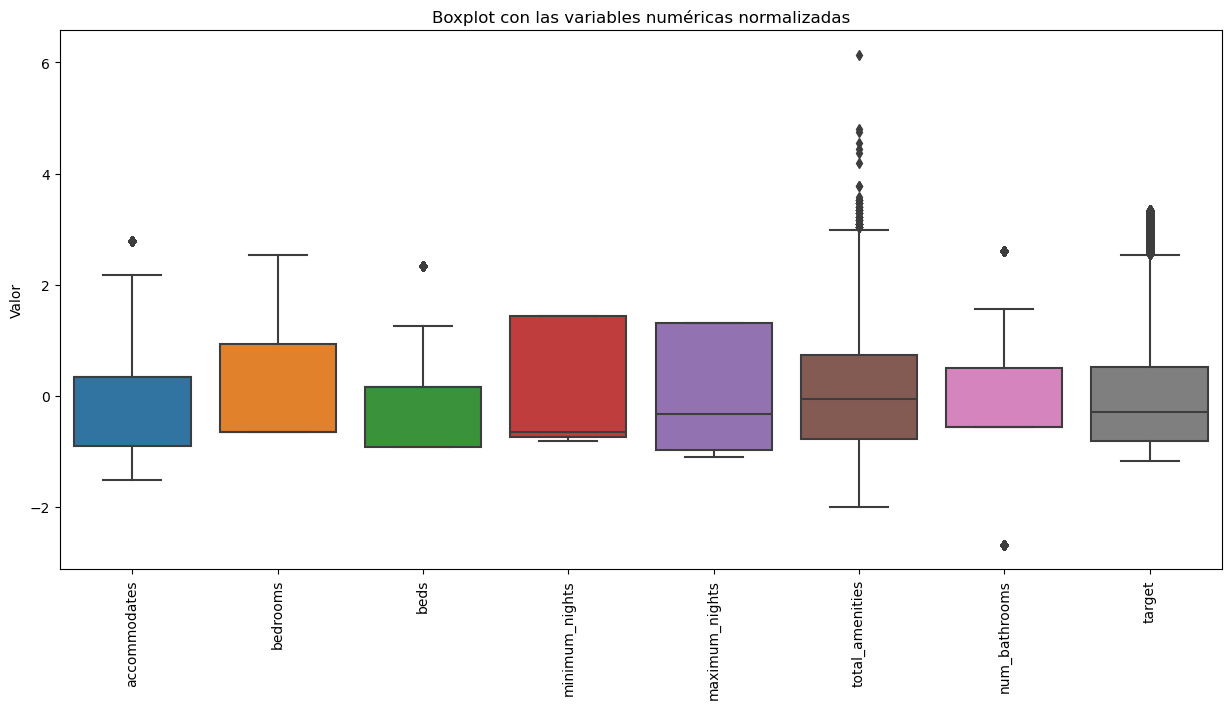

In [29]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos las columnas numéricas
columnas_numericas = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'total_amenities', 'num_bathrooms', 'target']
XY_seleccion = XY[columnas_numericas]

# Aplicamos la normalización de datos.
scaler = StandardScaler()
XY_normalizado = scaler.fit_transform(XY_seleccion)
XY_normalizado = pd.DataFrame(XY_normalizado, columns=columnas_numericas)

# Creamos el gráfico de cajas
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=XY_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(u'Boxplot con las variables numéricas normalizadas')
plt.ylabel('Valor')
plt.show()

El boxplot nos da una visualización sencilla que nos confirma que el número de outliers es reducido y residual, mientras que el bloque de datos es consistente y en parámetros esperados, por lo que los valores anómalos han sido eliminados.

## 5.2 Histograma de distribuciones

Hemos comprobado que la eliminación de outliers tiene sentido, a continuación vamos a realizar una distribución gráfica de las variables para ver su comportamiento y características.

Esto se puede hacer a través de un histograma, que muestra la distribución y el número de veces que se repite.

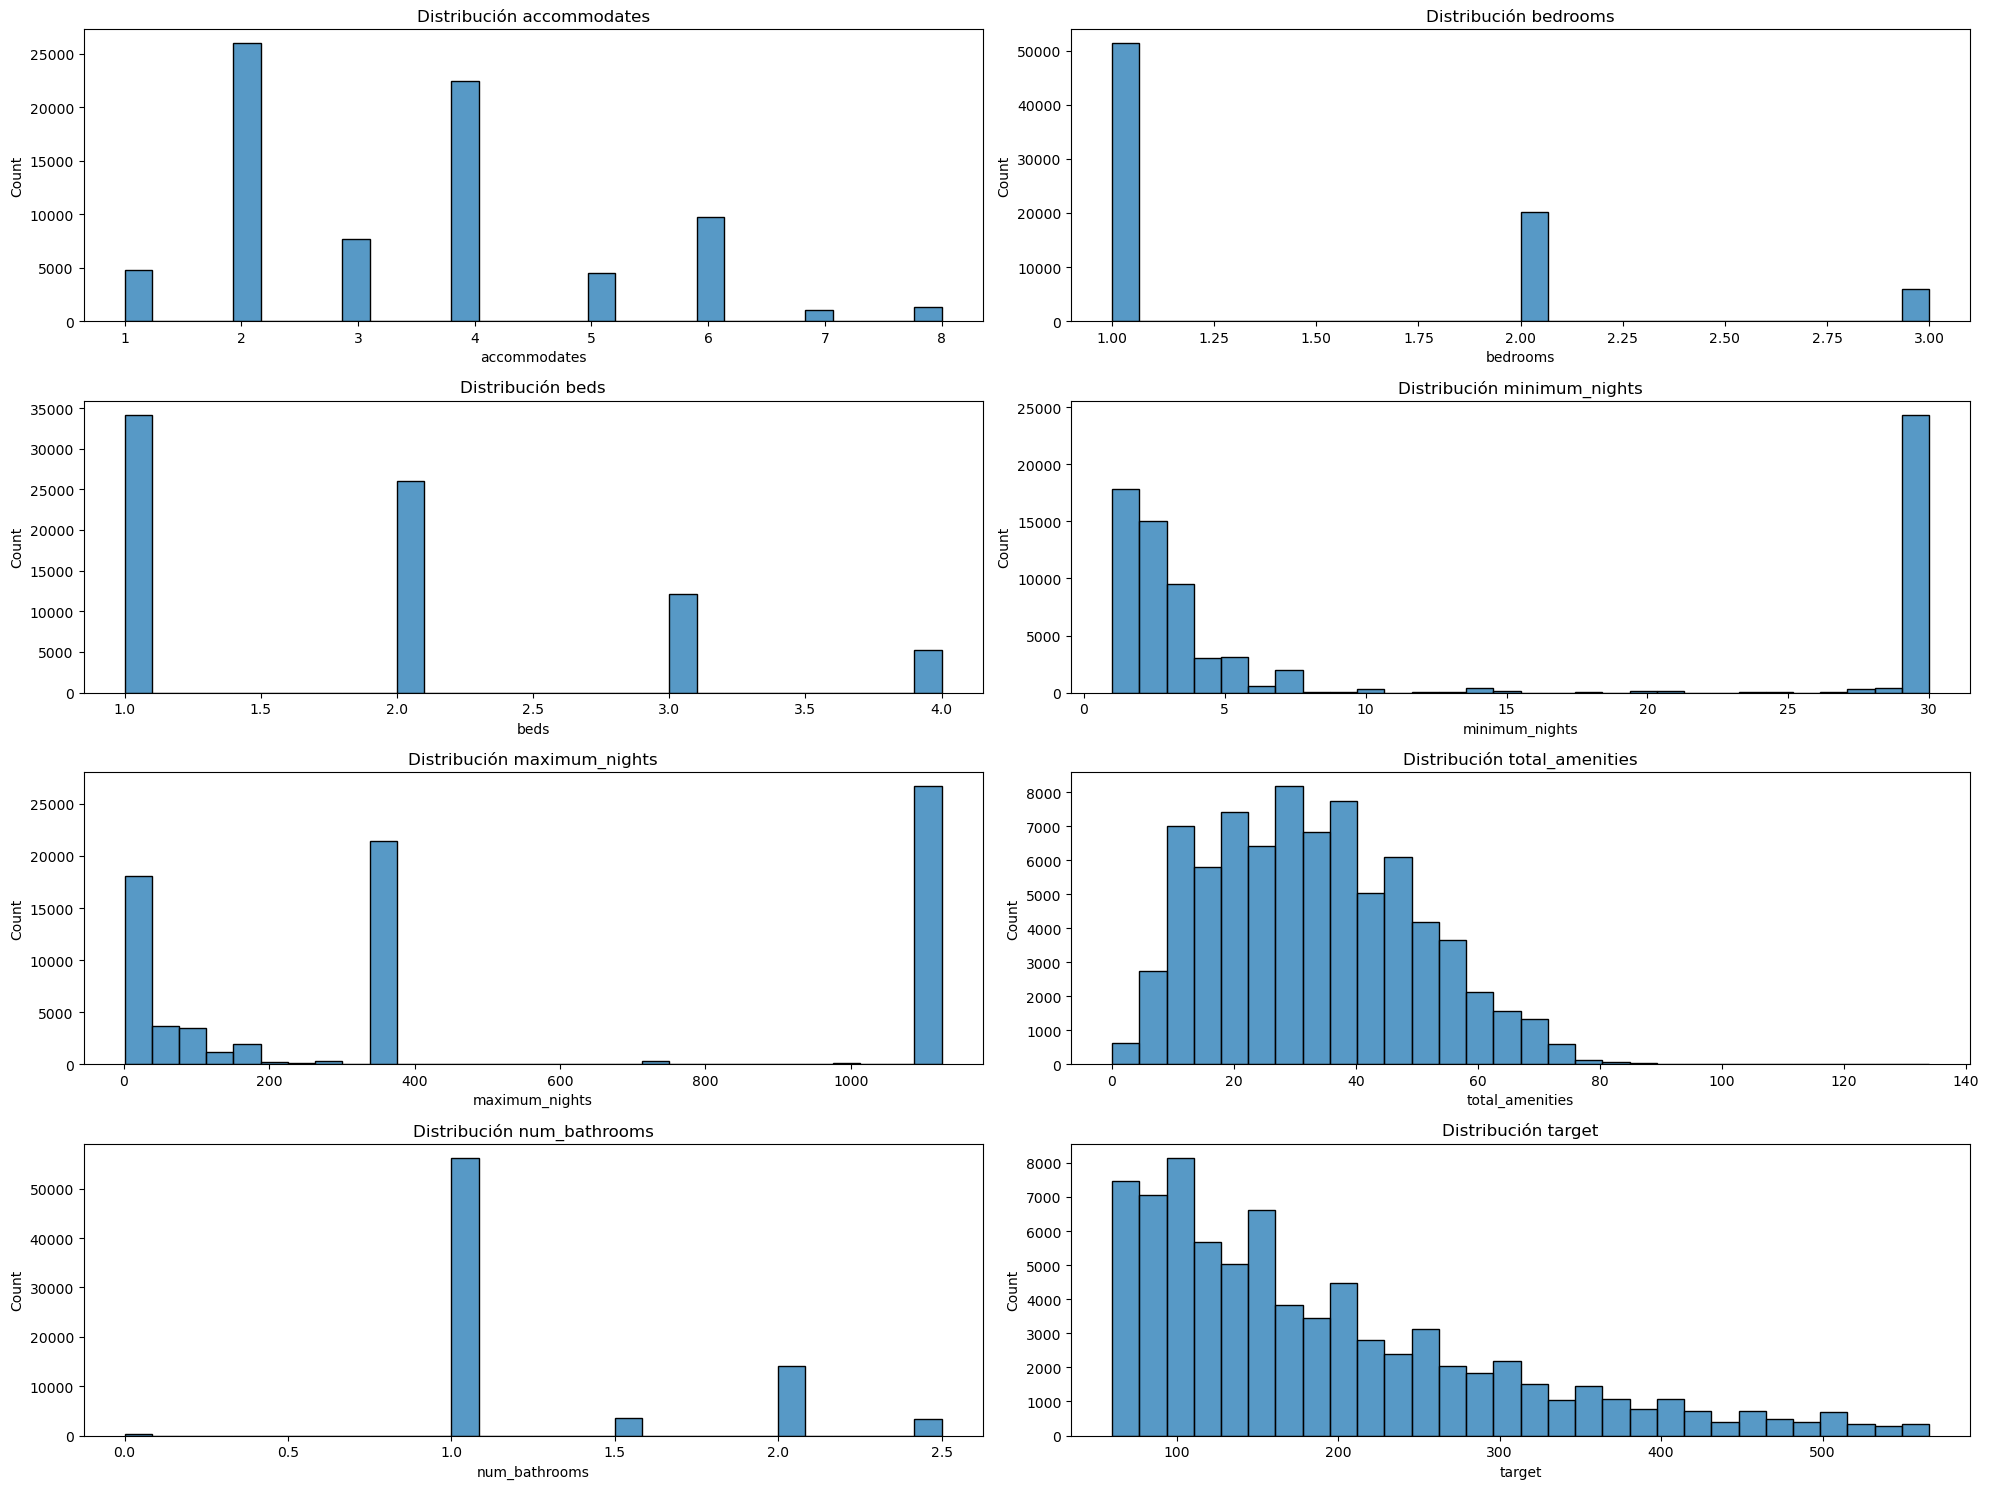

In [30]:
# Importamos y aplicamos warnings ya que el sistema que utilizaremos se dejará de usar en futuras versiones de Python via Jupyter Notebook 
# pero actualmente funcionan correctamente.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Establecemos la figura e iteramos las columnas de interes. Ya establecimos las columnas numéricas en la gráfica anterior.
plt.figure(figsize=(20, 15))
for i, column in enumerate(columnas_numericas):
    plt.subplot(4, 2, i + 1)
    sns.histplot(XY[column].dropna(), bins=30) 
    plt.title(f'Distribución {column}')
plt.tight_layout()
plt.show()

Las variables tienen una distribución con sentido para sus características. 
accommodates tiene como valores más frecuentes 2 o 4 inquilinos.
Habitaciones tiene como más frecuente 1, ya que los alquileres de habitación privada, compartida o de hotel suman a esta cifra.
El máximo y mínimo de noches tienen una progresión normal con la peculiaridad de que el máximo y mínimo de noches que permite la aplicación, es decir establecer un mínimo de 30 días (1 mes) de alquiler o el máximo de 365 o 1255 días es decir sin límite son valores muy presentes.
Por último, el valor más común de baños es solo uno, y el total de amenities y el precio total tienden a presentar cada vez menos valores ya que hay más propiedades de tamaños y precios reducidos y pocos de grandes propiedades con valores de lujo.


## 5.3 Correlación de Pearson

La correlación de las variables permite analizar como influye una variable sobre otra. Conceptualmente sencillo es entender como el incremente o decremento de una variable (o para las variables dummies su existencia o ausencia) afecta a otra variable. En este caso nos interesa especialmente la correlación con la variable precio.

En primer lugar vamos a analizar las variables numéricas.

Correlación numérica con respecto a 'target' (ordenada de mayor a menor):
accommodates       0.466888
beds               0.387433
bedrooms           0.361056
num_bathrooms      0.323091
total_amenities    0.119476
maximum_nights    -0.039710
minimum_nights    -0.229024
Name: target, dtype: float64


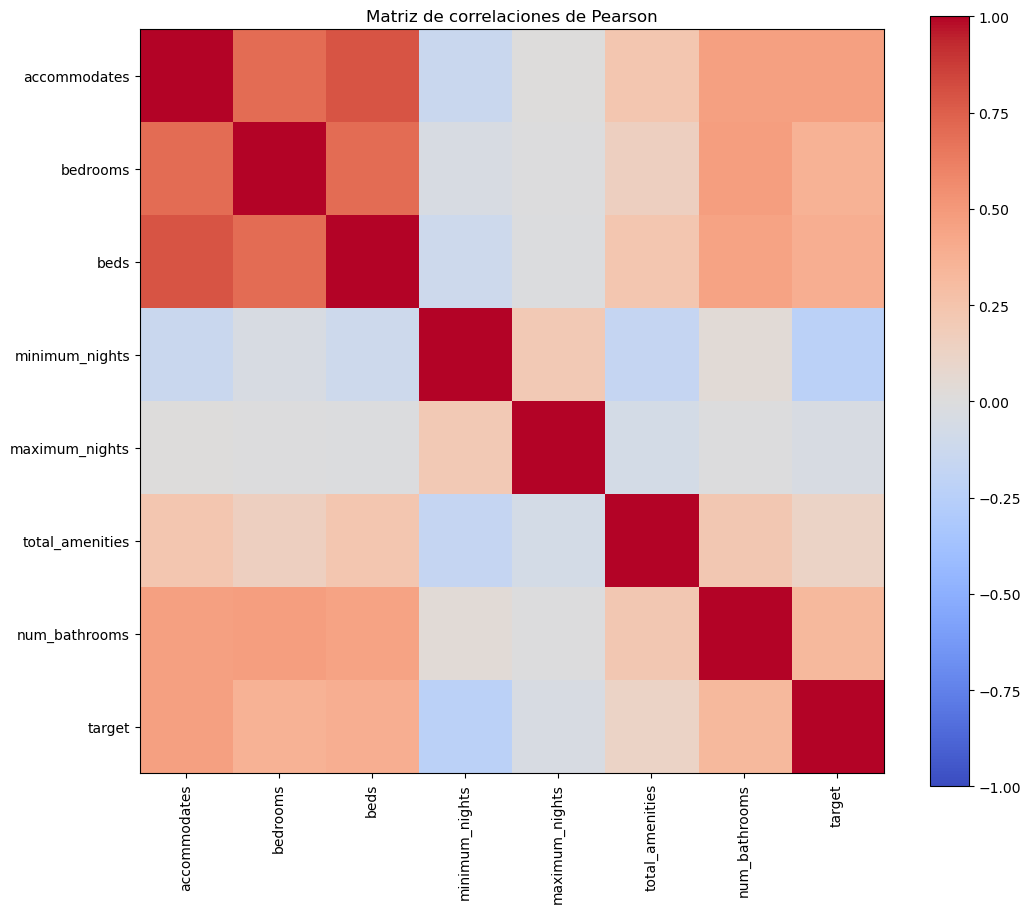

In [31]:
# Volvamos a señalar las columnas numéricas y calculamos el matriz de correlación a través de pearson.
XY_numerico = XY[columnas_numericas]
matriz_correlaciones = XY_numerico.corr(method='pearson')

# Extramos la correlación numérica exacta con target y la mostramos.
correlacion_target = matriz_correlaciones['target'].drop('target').sort_values(ascending=False)
print("Correlación numérica con respecto a 'target' (ordenada de mayor a menor):")
print(correlacion_target)

# Realizamos también una tabla de correlación que nos ayuda a visualizar no solo la correlación con target si no entre las variables.
n_ticks = len(columnas_numericas)
plt.figure(figsize=(12, 10))
plt.xticks(range(n_ticks), columnas_numericas, rotation='vertical')
plt.yticks(range(n_ticks), columnas_numericas)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', vmin=-1., vmax=1., cmap='coolwarm'))
plt.title('Matriz de correlaciones de Pearson')
plt.show()

Encontramos una tendencia lógica en la correlación del target. Un aumento en la cantidad de habitaciones, camas, baños, inquilinos o comodidades aumenta el precio, por otro lado, establecer una cantidad superior de noches mínimas o máximas tiende a reducir el precio. Ya que un número mayor de noches alquiladas tienen a la reducción de precio al ser un condicionante de cantidad y de la misma manera un máximo es un condicionante de salida de la propiedad.

Como ya hemos mencionado las variables dummies también presentan correlación respecto al precio. Por lo tanto vamos a calcular esta correlación para ver si tiene sentido su impacto en el precio.

In [32]:
# Establecemos las columnas dummies con el target (precio) y filtramos la columna.
columnas_dummies = ['location_Hawaii', 'location_Los Angeles', 'location_New York City', 'location_Rhode Island', 'location_Seattle', 
                          'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 
                          'Smoke alarm', 'Wifi', 'Kitchen', 'Essentials', 'Hangers', 'Carbon monoxide alarm', 'Hair dryer', 'Iron', 'Hot water', 
                          'Dishes and silverware', 'Refrigerator', 'Shampoo', 'Microwave', 'Cooking basics', 'Bed linens', 'Fire extinguisher', 
                          'Air conditioning', 'Heating', 'First aid kit', 'Self check-in', 'neighbourhood_group_cleansed_Ballard', 
                          'neighbourhood_group_cleansed_Beacon Hill', 'neighbourhood_group_cleansed_Bristol', 'neighbourhood_group_cleansed_Bronx', 
                          'neighbourhood_group_cleansed_Brooklyn', 'neighbourhood_group_cleansed_Capitol Hill', 'neighbourhood_group_cleansed_Cascade', 
                          'neighbourhood_group_cleansed_Central Area', 'neighbourhood_group_cleansed_City of Los Angeles', 'neighbourhood_group_cleansed_Delridge',
                          'neighbourhood_group_cleansed_Downtown', 'neighbourhood_group_cleansed_Hawaii', 'neighbourhood_group_cleansed_Honolulu', 
                          'neighbourhood_group_cleansed_Interbay', 'neighbourhood_group_cleansed_Kauai', 'neighbourhood_group_cleansed_Kent', 
                          'neighbourhood_group_cleansed_Lake City', 'neighbourhood_group_cleansed_Magnolia', 'neighbourhood_group_cleansed_Manhattan', 
                          'neighbourhood_group_cleansed_Maui', 'neighbourhood_group_cleansed_Newport', 'neighbourhood_group_cleansed_Northgate', 
                          'neighbourhood_group_cleansed_Other Cities', 'neighbourhood_group_cleansed_Other neighborhoods', 'neighbourhood_group_cleansed_Providence',
                          'neighbourhood_group_cleansed_Queen Anne', 'neighbourhood_group_cleansed_Queens', 'neighbourhood_group_cleansed_Rainier Valley',
                          'neighbourhood_group_cleansed_Seward Park', 'neighbourhood_group_cleansed_Staten Island', 'neighbourhood_group_cleansed_Unincorporated Areas',
                          'neighbourhood_group_cleansed_University District', 'neighbourhood_group_cleansed_Washington', 'neighbourhood_group_cleansed_West Seattle', 
                          'target']

XY_dummies = XY[columnas_dummies]

# Calculamos la correlación de pearson, esta vez son muchos valores así que vamos a mostrar en display solo los más influyentes.
matriz_correlaciones = XY_dummies.corr(method='pearson')
correlacion_target = matriz_correlaciones['target'].drop('target').sort_values(ascending=False)
print("Alta correlación positiva con el precio:")
print(correlacion_target.head(2))
print("Alta correlación negativa con el precio:")
print(correlacion_target.tail(2))

Alta correlación positiva con el precio:
location_Hawaii              0.395048
room_type_Entire home/apt    0.360759
Name: target, dtype: float64
Alta correlación negativa con el precio:
location_New York City   -0.192913
room_type_Private room   -0.360218
Name: target, dtype: float64


Podemos apreciar como las variables dummy también tienen una correlación respecto a la variable target. Por ejemplo, podemos ver como la localización en Hawaii aumenta mucho los precios en comparación con Nueva York que tiende a bajarlos en correlación con el resto de las localizaciones. Es decir, una localización es generalmente más barata y la otra más cara.

A su vez una casa entera tiende a aumentar mucho el precio mientras que una habitación privada tiende a bajarlo, esto también tiene sentido por lo que indica salud en el modelo.


# 6. Test & Train

Para poder evaluar el rendimiento del nuestro modelo de aprendizaje automático, tenemos que establecer un conjunto de entrenamiento (train) y un conjunto de prueba (test).

La parte test representará los datos disponibles para que el modelo realice las predicciones y compare sus resultados, mientras que la parte train compone el conjunto de datos que nutrirán el modelo de machine learning.

Tenemos pues que establecer una parte train y otra test, para ambos dataframes, tanto X que compone los datos generales como Y que contiene el precio como variable objetivo. 

La división en este caso es de un 15%, se han tratado distintas divisiones hasta encontrar aquella que diese un modelo con mejores resultados, evaluando la precisión del modelo y evitando un sobreajuste. Esto significa que un 85% de los datos entrenarán el modelo mientras que el otro 15% se usarán para estudiar su precisión.

Para esto utilizaremos "train_test_split", una herramienta especializada para dividir estos datos entre test y train para su posterior uso.


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

Ahora que hemos limpiado y preparados los datos, y que hemos establecido la target, vamos a realizar distintos modelos de aprendizaje automático a fin de obtener un modelo eficaz.

Estas son las variables que hay que introducimos en el modelo que vamos a aplicar a continuación.

In [34]:
for column in X.columns:
    print(f"{column}: {X[column].dtype}")

accommodates: int64
bedrooms: float64
beds: float64
minimum_nights: int64
maximum_nights: int64
Smoke alarm: int64
Wifi: int64
Kitchen: int64
Essentials: int64
Hangers: int64
Carbon monoxide alarm: int64
Hair dryer: int64
Iron: int64
Hot water: int64
Dishes and silverware: int64
Refrigerator: int64
Shampoo: int64
Microwave: int64
Cooking basics: int64
Bed linens: int64
Fire extinguisher: int64
Air conditioning: int64
Heating: int64
First aid kit: int64
Self check-in: int64
total_amenities: int64
num_bathrooms: float64
neighbourhood_group_cleansed_Ballard: int64
neighbourhood_group_cleansed_Beacon Hill: int64
neighbourhood_group_cleansed_Bristol: int64
neighbourhood_group_cleansed_Bronx: int64
neighbourhood_group_cleansed_Brooklyn: int64
neighbourhood_group_cleansed_Capitol Hill: int64
neighbourhood_group_cleansed_Cascade: int64
neighbourhood_group_cleansed_Central Area: int64
neighbourhood_group_cleansed_City of Los Angeles: int64
neighbourhood_group_cleansed_Delridge: int64
neighbourh

# 7. Modelos de Machine Learning

## 7.1 Modelo - Regresión Lineal

La regresión lineal es un enfoque para tomar en el Marchine Learning, que establece un algoritmo relacionando variables independientes con una variable dependiente (En este caso el precio) de manera lineal.

Este es un potencial modelo a utilizar debido a que nuestro modelo presenta este tipo de relación entre variables.

### Establecer modelo

Para establcer el modelo utilizamos Linear Regression, que como su nombre indica permite establecer una regresión linear.
Creamos el modelo de regresión señalando los tramos de entrenamiento (train) de los datos.

In [35]:
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

Aplicamos la predicción de Y (precio) según los datos de entrenamiento y test.

In [36]:
Y_pred_train = modelo_regresion.predict(X_train)
Y_pred_test = modelo_regresion.predict(X_test)

Importamos los recursos para calcular el error cuadrático medio y el coeficiente determinación. A partir de ahora referidos como MSE y R² en su forma abreviada. 

El error cuadrático medie cual es el promedio de los errores al cuadrado entre el valor de un estimador y el de su estimación. Es un parámetro muy útil para realizar predicciones como en este caso. A la hora de comparar modelos, aquel que presente un menor MSE será representativo de una mejor calidad de modelo.

El coeficiente de determinación (R²) es un estadístico establece entre 0 y 1 según la capacidad de predicción del modelo. Siendo 0 la total incapacidad de predicción y 1 una predicción perfecta en todos los casos. Un modelo con un alto R² generalmente es el mejor modelo para elegir (Excepto si bajo escenarios de sobreajuste).

Una vez establecido los valores de MSE y R² realizaremos también la representación gráfica de las predicciones


Evaluación del modelo:
MSE: 6718.749406826796
R²: 0.4658384175652456


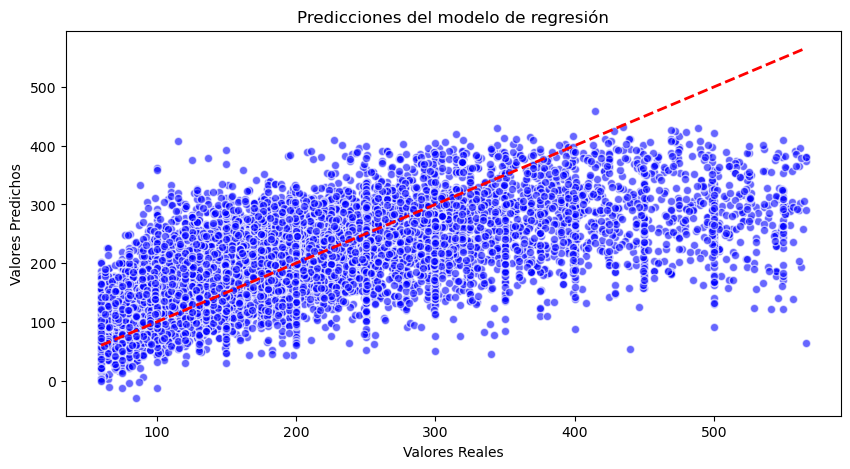

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
print(f'Evaluación del modelo:')
print(f'MSE: {mse_test}')
print(f'R²: {r2_test}')

# Gráfica con los resultados
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_test, color='blue', edgecolor='w', alpha=0.6)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones del modelo de regresión')
plt.show()

El valor de MSE es poco representativo hasta que lo comparemos con el resto de los modelos. Del mismo modo R2 también es comparable pero la cifra actual se encuentra por debajo de 0.5, esto implica que menos de la mitad de las predicciones son precisas, un indicativo poco elevado generalmente en los modelos.

Podemos ver además como si bien los valores reales y predichos tienen una tendencia con sentido, la dispersión de valores es elevada.

Vamos a establecer otros modelos intentando mejorar la precisión.


## 7.2 Modelos - Ridge y Lasso

Otras técnicas de regresión pupulares para restablecer modelos de predicción y aplicables para Machine Learning son Ridge y Lasso.

Si bien se establecen como modelos independientes sus características son muy similares por lo que suelen presentarse juntos.

Estos modelos son especialmente útiles para evitar sobreajustes, y esto puede ser especialmente útil para un modelo como este en el que la localización puede condicionar mucho los precios. 

Estos métodos agregan una penalización al modelo a fin de readucir los coeficientes y eliminar predictores irrelevantes. 

Ridge por un lado reduce la magnitud de los coeficientes mientras que Lassso puede reducir directamente los coeficientes a 0.

MSE: 6718.778884659101
R²: 0.4658360739854218


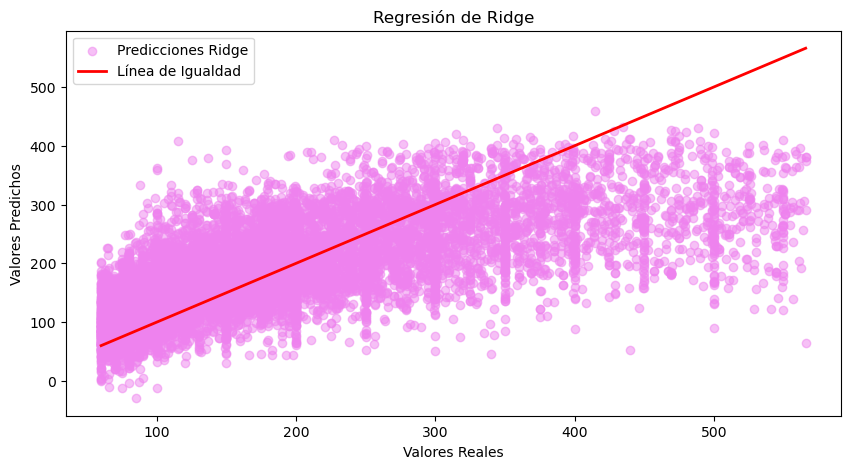

In [38]:
from sklearn.linear_model import Ridge

# Establecemos el modelo, el valor alpha 1 indica la penalzación.
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

# Realizamos las predicciones y evaluamos el modelo.
Y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f'MSE: {mse_ridge}')
print(f'R²: {r2_ridge}')

# Observamos la representación gráfica
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_ridge, color='violet', alpha=0.5, label='Predicciones Ridge')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión de Ridge')
plt.legend()
plt.show()

Podemos ver poca variación respecto al modelo de regresión linear. Vamos a aplicar Lasso antes de extraer conclusiones.

MSE: 6762.1387506757765
R²: 0.46238882908265866


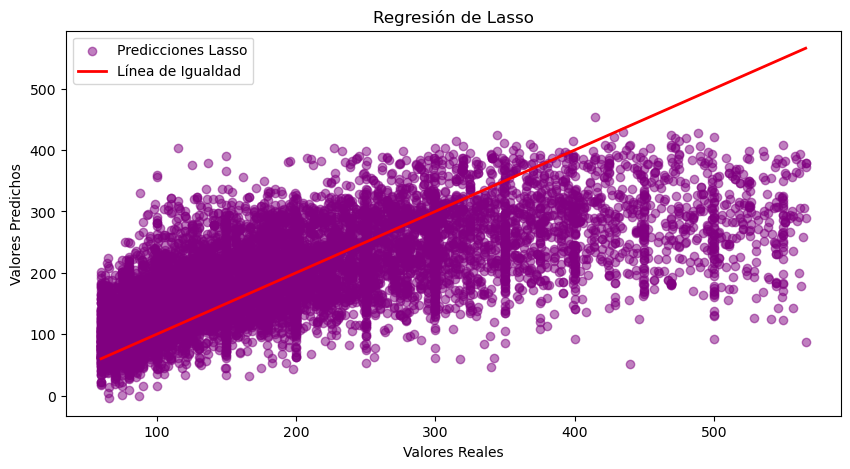

In [39]:
from sklearn.linear_model import Lasso

# Establecemos el modelo y predicción.
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, Y_train)
Y_pred_lasso = lasso_model.predict(X_test)

# Evaluamos el modelo
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print(f'MSE: {mse_lasso}')
print(f'R²: {r2_lasso}')

# Establecemos la gráfica
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_lasso, color='purple', alpha=0.5, label='Predicciones Lasso')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión de Lasso')
plt.legend()
plt.show()

Los valores obtenidos en los 3 modelos son muy similares:

Linear - MSE: 6718.715740020915 / R²: 0.4658410941815645

Ridge - MSE: 6718.778884659101 / R²: 0.465836073985421

Lasso - MSE: 6762.1387506757765 / R²: 0.4623888290826586

El mejor modelo por muy poca diferencia en este momento es el linear, ya que es el que tiene menor MSE y mayor R². La poca variación en los resultados del modelo implica que es un modelo robusto, sin sobreajuste y con variables concretas con mucha relevancia. Por lo que, si bien la capacidad predictiva del mismo es mejorable, en líneas generales los datos parecen bien tratados.


## 7.3 Modelos - Decision Tree y Random Forest

Otros métodos de aprendizaje supervisado para el machine learning que podemos emplear son Decision Tree y Random Forest.

Decision Tree es un algoritmo que emplea clasificación y regresión para establecer su algoritmo.
El árbol empieza por una base y va desarrollando "ramas" según las distintas clasificaciones entre ellas, entendiendo sus relaciones y formando subconjuntos homogéneos clasificando los datos.

Vamos a importar el regresor para realizar el Decision Tree y posteriormente abordaremos el modelo de Random Forest


MSE: 10159.382809402248
R²: 0.19229730572824688


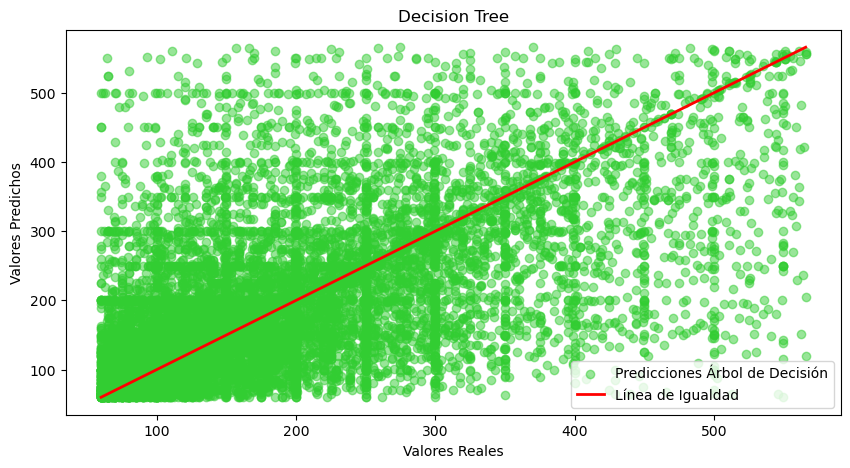

In [40]:
from sklearn.tree import DecisionTreeRegressor

# Establecemos el modelo y predecimos.
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, Y_train)
Y_pred_tree = tree_model.predict(X_test)

# Evaluamos el modelo.
mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)

print(f'MSE: {mse_tree}')
print(f'R²: {r2_tree}')

# Visualizamos de los resultados
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_tree, color='limegreen', alpha=0.5, label='Predicciones Árbol de Decisión')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Decision Tree')
plt.legend()
plt.show()

Los resultados del modelo son mucho peores a los modelos previos. Esto puede ser debido a que tenemos un amplio número de variables con poca linealidad entre ellas. Además, este modelo no es bueno trabajando relaciones complejas entre muchas variables.

A pesar de que la primera impresión sea que este tipo de modelo no es útil para los datos utilizados, el modelo derivado conocido como Random Forest puede dar grandes resultados. Esto es debido a que establece muchos arboles de decisiones para formular un resultado final unitario. Es un modelo que requiere más tiempo y recursos para procesar, pero permite establecer muchas más relaciones entre las muchas variables del modelo aun teniendo relaciones complejas.


MSE: 5238.500219330838
R²: 0.5835228556226009


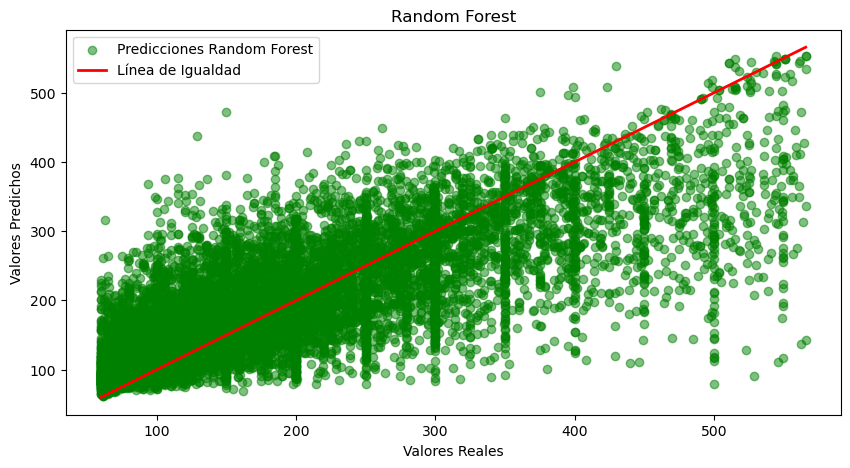

In [41]:
# Importamos el regresor, establecemos el modelo y realizamos las predicciones.
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

# Evaluamos y visualizamos el modelo.
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)

print(f'MSE: {mse_rf}')
print(f'R²: {r2_rf}')

plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_rf, color='green', alpha=0.5, label='Predicciones Random Forest')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest')
plt.legend()
plt.show()

El modelo ha funcionado muy bien, presenta el mejor R² hasta el momento y el menor MSE. Esto implica que la potencia del modelo ha funcionado correctamente al ser capaz de relacionar un número amplio de variables con relaciones complejas.

## 7.4 Modelo - Gradient Boosting

Si bien el modelo Random Forest presenta unos buenos valores para el modelo y podríamos adoptarlo como un modelo sano a utilizar, hay otro modelo popular para realizar regresiones y establecer un algoritmo vía Machine Learning que es Gradient Boosting. Por lo que vamos a aplicar este modelo por diese mejores predicciones que Random Forest.

Este modelo establece un análisis en distintas etapas, donde corrige los errores de la etapa anterior a medida que se procesa.


Gradient Boosting Mean Squared Error: 6235.593245363433
Gradient Boosting R^2 Score: 0.5042508428758454


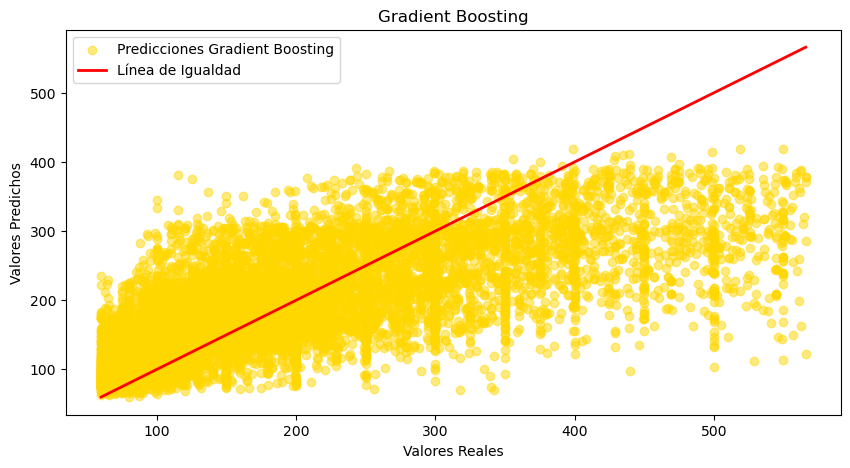

In [42]:
# Importamos el regresor, establecemos el modelo y realizamos la predicción.
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=0)
gb_model.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)

# Evaluamos el modelo y vemos su gráfica correspondiente.
mse_gb = mean_squared_error(Y_test, Y_pred_gb)
r2_gb = r2_score(Y_test, Y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R^2 Score: {r2_gb}')

plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_gb, color='gold', alpha=0.5, label='Predicciones Gradient Boosting')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gradient Boosting')
plt.legend()
plt.show()

El modelo funciona relativamente bien, de hecho tiene mayor R2 y menor MSE que otros modelos.

## 7.5 Conclusiones respecto a los modelos

La evaluación de los modelos mediante Error Cuadrático Medio y Coeficiente de Determinación es la siguiente:

* Linear - MSE: 6718.71 / R²: 0.46584
* Ridge - MSE: 6718.77 / R ²: 0.46583
* Lasso - MSE: 6762.13 / R²: 0.462388
* Decision Tree - MSE: 10159.38 / R²: 0.19229
* Random Forest - MSE: 5238.50 / R²: 0.58359
* Gradient Boosting - MSE: 6235.59 / R²: 0.50425

De acuerdo con estas métricas, el modelo de Random Forest es el que presenta el mejor desempeño, ya que tiene el MSE más bajo (5238.50) y el R² más alto (0.58359).
Comparado con los otros modelos, el Random Forest logra una mejor precisión en las predicciones y ajusta mejor los datos observados. Por lo tanto, podemos concluir que, basado en estas métricas, el modelo de Random Forest es el mejor y va a ser sobre el que apliquemos las predicciones.

# 8. Estimador de precios

## 8.1 Estimador Manual

Por último, vamos a establecer el estimador de precios. En primer lugar, vamos a introducir un dato de forma manual para asegurarnos de que el modelo lo procesa correctamente y es capaz de predecir el valor del precio correctamente.

Para el ejemplo vamos a establecer una casa en Brooklyn (Nueva York) para 4 personas, dos habitaciones, 3 camas y distintas funcionalidades para estimar su precio.

In [43]:
# Establecemos el dato que queremos predecir y el valor de cada una de sus variables.

dato_prueba = {
    'accommodates': 4,
    'bedrooms': 2,
    'beds': 3,
    'minimum_nights': 1,
    'maximum_nights': 30,
    'Smoke alarm': 1,
    'Wifi': 1,
    'Kitchen': 1,
    'Essentials': 1,
    'Hangers': 0,
    'Carbon monoxide alarm': 0,
    'Hair dryer': 1,
    'Iron': 1,
    'Hot water': 0,
    'Dishes and silverware': 0,
    'Refrigerator': 1,
    'Shampoo': 0,
    'Microwave': 1,
    'Cooking basics': 0,
    'Bed linens': 1,
    'Fire extinguisher': 0,
    'Air conditioning': 1,
    'Heating': 1,
    'First aid kit': 1,
    'Self check-in': 0,
    'total_amenities': 15,
    'num_bathrooms': 1.0,
    'neighbourhood_group_cleansed_Ballard': 0,
    'neighbourhood_group_cleansed_Beacon Hill': 0,
    'neighbourhood_group_cleansed_Bristol': 0,
    'neighbourhood_group_cleansed_Bronx': 0,
    'neighbourhood_group_cleansed_Brooklyn': 1,
    'neighbourhood_group_cleansed_Capitol Hill': 0,
    'neighbourhood_group_cleansed_Cascade': 0,
    'neighbourhood_group_cleansed_Central Area': 0,
    'neighbourhood_group_cleansed_City of Los Angeles': 0,
    'neighbourhood_group_cleansed_Delridge': 0,
    'neighbourhood_group_cleansed_Downtown': 0,
    'neighbourhood_group_cleansed_Hawaii': 0,
    'neighbourhood_group_cleansed_Honolulu': 0,
    'neighbourhood_group_cleansed_Interbay': 0,
    'neighbourhood_group_cleansed_Kauai': 0,
    'neighbourhood_group_cleansed_Kent': 0,
    'neighbourhood_group_cleansed_Lake City': 0,
    'neighbourhood_group_cleansed_Magnolia': 0,
    'neighbourhood_group_cleansed_Manhattan': 0,
    'neighbourhood_group_cleansed_Maui': 0,
    'neighbourhood_group_cleansed_Newport': 0,
    'neighbourhood_group_cleansed_Northgate': 0,
    'neighbourhood_group_cleansed_Other Cities': 0,
    'neighbourhood_group_cleansed_Other neighborhoods': 0,
    'neighbourhood_group_cleansed_Providence': 0,
    'neighbourhood_group_cleansed_Queen Anne': 0,
    'neighbourhood_group_cleansed_Queens': 0,
    'neighbourhood_group_cleansed_Rainier Valley': 0,
    'neighbourhood_group_cleansed_Seward Park': 0,
    'neighbourhood_group_cleansed_Staten Island': 0,
    'neighbourhood_group_cleansed_Unincorporated Areas': 0,
    'neighbourhood_group_cleansed_University District': 0,
    'neighbourhood_group_cleansed_Washington': 0,
    'neighbourhood_group_cleansed_West Seattle': 0,
    'room_type_Entire home/apt': 1,
    'room_type_Hotel room': 0,
    'room_type_Private room': 0,
    'room_type_Shared room': 0,
    'bathrooms_text_clean_ bath': 1,
    'bathrooms_text_clean_ private bath': 0,
    'bathrooms_text_clean_ shared bath': 0,
    'bathrooms_text_clean_Half-bath': 0,
    'bathrooms_text_clean_Private half-bath': 0,
    'bathrooms_text_clean_Shared half-bath': 0,
    'location_Hawaii': 0,
    'location_Los Angeles': 0,
    'location_New York City': 1,
    'location_Rhode Island': 0,
    'location_Seattle': 0,
}

# Convertimos el dataframe y establecemos las columnas en el mismo orden que el dataframe de entrenamiento.
dataframe_prueba = pd.DataFrame([dato_prueba])

# Pasamo el dataframe a numpy array.
nuevo_array = dataframe_prueba.to_numpy()

# Obtenemos la predicción estableciendo el dato en el dataframe para el modelo de random forest (rf) creado previamente.
prediccion_random_forest = np.array([tree.predict(nuevo_array) for tree in rf_model.estimators_])

# Como no queremos un valor concreto, si no proponer una estimación y que el cliente determine,
# establecemos la estimación respecto al percentil 45 y 55. Dando un valores cerrado y cercanos al punto óptimo.
# establecemos el mensaje de salida, en inglés ya que es el público objetivo de esta herramienta.
estimacion_inferior = np.percentile(prediccion_random_forest, 45)
estimacion_superior = np.percentile(prediccion_random_forest, 55)

print(f"The recommended price per night is: ${estimacion_inferior:.2f} - ${estimacion_superior:.2f}")

The recommended price per night is: $153.30 - $180.00


El precio recomendado por noche de esta casa completa para 4 personas sería de entre 153.30 y 180 \$

## 8.2 Estimador con widgets

Hemos podido comprobar que el modelo está entregando el outcome que buscábamos con éxito. No obstante, esta forma de introducir los datos es útil para comprobar si funciona el modelo, pero no realmente útil para a efectos prácticos, aplicarlo a un programa utilizable por el usuario promedio.

Para solucionar esto estableceremos un sistema de widgets en el que podamos introducir los datos manualmente con una interfaz cómoda y funciona para obtener los valores buscados.


In [50]:
#Importamos widgets de ipywidgets para poder establecer widgets, que sirve para establecer widgets via HTML y son además 
# fácilmente exportables a formato web.
#Para presnetar la mejor interfaz posible importamos display de IPython.display y HTML que lo usaremos para dar un display final más vistoso.
import ipywidgets as widgets
from IPython.display import display, HTML

# Añadimos los posibles valores para cada uno de los widgets.
# Aquí estableceremos por un lado variables numéricas como IntSlider y las variables dummies como casillas checkbox.
accommodates = widgets.IntSlider(min=1, max=10, value=0, description='Accommodates')
bedrooms = widgets.IntSlider(min=0, max=10, value=0, description='Bedrooms')
beds = widgets.IntSlider(min=0, max=10, value=0, description='Beds')
minimum_nights = widgets.IntSlider(min=1, max=30, value=1, description='Min Nights')
maximum_nights = widgets.IntSlider(min=1, max=365, value=30, description='Max Nights')
smoke_alarm = widgets.Checkbox(value=True, description='Smoke Alarm')
wifi = widgets.Checkbox(value=True, description='Wifi')
kitchen = widgets.Checkbox(value=True, description='Kitchen')
essentials = widgets.Checkbox(value=True, description='Essentials')
hangers = widgets.Checkbox(value=False, description='Hangers')
carbon_monoxide_alarm = widgets.Checkbox(value=False, description='CO Alarm')
hair_dryer = widgets.Checkbox(value=True, description='Hair Dryer')
iron = widgets.Checkbox(value=True, description='Iron')
hot_water = widgets.Checkbox(value=False, description='Hot Water')
dishes_and_silverware = widgets.Checkbox(value=False, description='Dishes')
refrigerator = widgets.Checkbox(value=True, description='Refrigerator')
shampoo = widgets.Checkbox(value=False, description='Shampoo')
microwave = widgets.Checkbox(value=True, description='Microwave')
cooking_basics = widgets.Checkbox(value=False, description='Cooking Basics')
bed_linens = widgets.Checkbox(value=True, description='Bed Linens')
fire_extinguisher = widgets.Checkbox(value=False, description='Fire Extinguisher')
air_conditioning = widgets.Checkbox(value=True, description='AC')
heating = widgets.Checkbox(value=True, description='Heating')
first_aid_kit = widgets.Checkbox(value=True, description='First Aid')
self_check_in = widgets.Checkbox(value=False, description='Self Check-in')
num_bathrooms = widgets.IntSlider(min=0, max=10, value=0, description='Bathrooms')

# Para las variables con distintas opciones únicas utilizarmeos un dropdown.
# La localización además tiene jerarquía ya que las zonas / ciudades son exclusivas de ciertos estados.
# Por esta razón establecermos primero una lista para la localización y sus opciones posibles en ella.
location_options = {
    'Hawaii': ['Kauai', 'Maui', 'Honolulu', 'Hawaii'],
    'Los Angeles': ['Unincorporated Areas', 'Other Cities', 'City of Los Angeles'],
    'New York City': ['Brooklyn', 'Staten Island', 'Bronx', 'Queens', 'Manhattan'],
    'Rhode Island': ['Providence', 'Newport', 'Kent', 'Washington', 'Bristol'],
    'Seattle': ['Other neighborhoods', 'West Seattle', 'Ballard', 'Cascade', 'Capitol Hill', 'Queen Anne', 'Rainier Valley', 'Magnolia', 'Beacon Hill', 'Downtown', 'Lake City', 'Central Area', 'University District', 'Delridge', 'Northgate', 'Interbay', 'Seward Park']
}

# Establecemos el dropdown de localización.
location_dropdown = widgets.Dropdown(
    options=list(location_options.keys()),
    description='Location'
)

# Establcemos el dropdown de zona (ciudad).
neighborhood_dropdown = widgets.Dropdown(
    options=[],
    description='Zone'
)

# Definimos la correlación entre ambas variables.
def actualizador_ubicacion(*args):
    selected_location = location_dropdown.value
    neighborhood_dropdown.options = location_options[selected_location]

# Establecemos el evento entre ambas variables.
location_dropdown.observe(actualizador_ubicacion, 'value')

# Establecemos el display del widget, señalando su actualización.
display(location_dropdown, neighborhood_dropdown)
actualizador_ubicacion()

# Desarrollamos las otras variables con valores únicos como son el tipo de propiedad y el tipo de baño.
room_type = widgets.Dropdown(
    options=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
    description='Place Type'
)

bathrooms_text = widgets.Dropdown(
    options=['Bath', 'Private bath', 'Shared bath', 'Half-bath', 'Private half-bath', 'Shared half-bath'],
    description='Main Type'
)

# Ahora que hemos establecido todos los widgets establecemos la definició nde precio, que depende de todas las variables del modelo.
def predictor_precio(accommodates, bedrooms, beds, minimum_nights, maximum_nights, smoke_alarm, wifi, kitchen, essentials,
                  hangers, carbon_monoxide_alarm, hair_dryer, iron, hot_water, dishes_and_silverware, refrigerator,
                  shampoo, microwave, cooking_basics, bed_linens, fire_extinguisher, air_conditioning, heating, 
                  first_aid_kit, self_check_in, num_bathrooms, neighborhood_dropdown, room_type, bathrooms_text, 
                  location_dropdown):
    
# Establecemos los checkboxes que hemos creado como int (1 está presenta, 0 no lo está) ya que es el formato dummie que le hemos dado.
    smoke_alarm = int(smoke_alarm)
    wifi = int(wifi)
    kitchen = int(kitchen)
    essentials = int(essentials)
    hangers = int(hangers)
    carbon_monoxide_alarm = int(carbon_monoxide_alarm)
    hair_dryer = int(hair_dryer)
    iron = int(iron)
    hot_water = int(hot_water)
    dishes_and_silverware = int(dishes_and_silverware)
    refrigerator = int(refrigerator)
    shampoo = int(shampoo)
    microwave = int(microwave)
    cooking_basics = int(cooking_basics)
    bed_linens = int(bed_linens)
    fire_extinguisher = int(fire_extinguisher)
    air_conditioning = int(air_conditioning)
    heating = int(heating)
    first_aid_kit = int(first_aid_kit)
    self_check_in = int(self_check_in)

# Establecemos un diccionario para los datos nuevos, de forma que el dato introducido se condicione a las variables del modelo.
    dato_prueba = {
        'accommodates': accommodates,
        'bedrooms': bedrooms,
        'beds': beds,
        'minimum_nights': minimum_nights,
        'maximum_nights': maximum_nights,
        'Smoke alarm': smoke_alarm,
        'Wifi': wifi,
        'Kitchen': kitchen,
        'Essentials': essentials,
        'Hangers': hangers,
        'Carbon monoxide alarm': carbon_monoxide_alarm,
        'Hair dryer': hair_dryer,
        'Iron': iron,
        'Hot water': hot_water,
        'Dishes and silverware': dishes_and_silverware,
        'Refrigerator': refrigerator,
        'Shampoo': shampoo,
        'Microwave': microwave,
        'Cooking basics': cooking_basics,
        'Bed linens': bed_linens,
        'Fire extinguisher': fire_extinguisher,
        'Air conditioning': air_conditioning,
        'Heating': heating,
        'First aid kit': first_aid_kit,
        'Self check-in': self_check_in,
        'num_bathrooms': num_bathrooms,
        'neighbourhood_group_cleansed_Ballard': 1 if neighborhood_dropdown == 'Ballard' else 0,
        'neighbourhood_group_cleansed_Beacon Hill': 1 if neighborhood_dropdown == 'Beacon Hill' else 0,
        'neighbourhood_group_cleansed_Bristol': 1 if neighborhood_dropdown == 'Bristol' else 0,
        'neighbourhood_group_cleansed_Bronx': 1 if neighborhood_dropdown == 'Bronx' else 0,
        'neighbourhood_group_cleansed_Brooklyn': 1 if neighborhood_dropdown == 'Brooklyn' else 0,
        'neighbourhood_group_cleansed_Capitol Hill': 1 if neighborhood_dropdown == 'Capitol Hill' else 0,
        'neighbourhood_group_cleansed_Cascade': 1 if neighborhood_dropdown == 'Cascade' else 0,
        'neighbourhood_group_cleansed_Central Area': 1 if neighborhood_dropdown == 'Central Area' else 0,
        'neighbourhood_group_cleansed_City of Los Angeles': 1 if neighborhood_dropdown == 'City of Los Angeles' else 0,
        'neighbourhood_group_cleansed_Delridge': 1 if neighborhood_dropdown == 'Delridge' else 0,
        'neighbourhood_group_cleansed_Downtown': 1 if neighborhood_dropdown == 'Downtown' else 0,
        'neighbourhood_group_cleansed_Hawaii': 1 if neighborhood_dropdown == 'Hawaii' else 0,
        'neighbourhood_group_cleansed_Honolulu': 1 if neighborhood_dropdown == 'Honolulu' else 0,
        'neighbourhood_group_cleansed_Interbay': 1 if neighborhood_dropdown == 'Interbay' else 0,
        'neighbourhood_group_cleansed_Kauai': 1 if neighborhood_dropdown == 'Kauai' else 0,
        'neighbourhood_group_cleansed_Kent': 1 if neighborhood_dropdown == 'Kent' else 0,
        'neighbourhood_group_cleansed_Lake City': 1 if neighborhood_dropdown == 'Lake City' else 0,
        'neighbourhood_group_cleansed_Magnolia': 1 if neighborhood_dropdown == 'Magnolia' else 0,
        'neighbourhood_group_cleansed_Manhattan': 1 if neighborhood_dropdown == 'Manhattan' else 0,
        'neighbourhood_group_cleansed_Maui': 1 if neighborhood_dropdown == 'Maui' else 0,
        'neighbourhood_group_cleansed_Newport': 1 if neighborhood_dropdown == 'Newport' else 0,
        'neighbourhood_group_cleansed_Northgate': 1 if neighborhood_dropdown == 'Northgate' else 0,
        'neighbourhood_group_cleansed_Other Cities': 1 if neighborhood_dropdown == 'Other Cities' else 0,
        'neighbourhood_group_cleansed_Other neighborhoods': 1 if neighborhood_dropdown == 'Other neighborhoods' else 0,
        'neighbourhood_group_cleansed_Providence': 1 if neighborhood_dropdown == 'Providence' else 0,
        'neighbourhood_group_cleansed_Queen Anne': 1 if neighborhood_dropdown == 'Queen Anne' else 0,
        'neighbourhood_group_cleansed_Queens': 1 if neighborhood_dropdown == 'Queens' else 0,
        'neighbourhood_group_cleansed_Rainier Valley': 1 if neighborhood_dropdown == 'Rainier Valley' else 0,
        'neighbourhood_group_cleansed_Seward Park': 1 if neighborhood_dropdown == 'Seward Park' else 0,
        'neighbourhood_group_cleansed_Staten Island': 1 if neighborhood_dropdown == 'Staten Island' else 0,
        'neighbourhood_group_cleansed_Unincorporated Areas': 1 if neighborhood_dropdown == 'Unincorporated Areas' else 0,
        'neighbourhood_group_cleansed_University District': 1 if neighborhood_dropdown == 'University District' else 0,
        'neighbourhood_group_cleansed_Washington': 1 if neighborhood_dropdown == 'Washington' else 0,
        'neighbourhood_group_cleansed_West Seattle': 1 if neighborhood_dropdown == 'West Seattle' else 0,
        'room_type_Entire home/apt': 1 if room_type == 'Entire home/apt' else 0,
        'room_type_Hotel room': 1 if room_type == 'Hotel room' else 0,
        'room_type_Private room': 1 if room_type == 'Private room' else 0,
        'room_type_Shared room': 1 if room_type == 'Shared room' else 0,
        'bathrooms_text_clean_ bath': 1 if bathrooms_text == 'Bath' else 0,
        'bathrooms_text_clean_ Private bath': 1 if bathrooms_text == 'Private bath' else 0,
        'bathrooms_text_clean_ shared bath': 1 if bathrooms_text == 'Shared bath' else 0,
        'bathrooms_text_clean_Half-bath': 1 if bathrooms_text == 'Half-bath' else 0,
        'bathrooms_text_clean_Private half-bath': 1 if bathrooms_text == 'Private half-bath' else 0,
        'bathrooms_text_clean_Shared half-bath': 1 if bathrooms_text == 'Shared half-bath' else 0,
        'location_Hawaii': 1 if location == 'Hawaii' else 0,
        'location_Los Angeles': 1 if location == 'Los Angeles' else 0,
        'location_New York City': 1 if location == 'New York City' else 0,
        'location_Rhode Island': 1 if location == 'Rhode Island' else 0,
        'location_Seattle': 1 if location == 'Seattle' else 0,
    }

# Añadimos a cualquier columna faltante el valor 0, por si el cliente deja alguna opción en blanco.
    for col in X.columns:
        if col not in dato_prueba:
            dato_prueba[col] = 0

# Establecemos el dataframe de prueba par a la predicción.
    dataframe_prueba = pd.DataFrame([dato_prueba])
    dataframe_prueba = dataframe_prueba[X.columns]
    nuevo_array = dataframe_prueba.to_numpy()
    
# Aplicamos la predicción al modelo random forest creado (rf_model)
# En esta ocasión establecemos el resultado como int (número entero) ya que la aplicación de Airbnb no permite establecer decimales en el precio.
    prediccion_random_forest = np.array([tree.predict(nuevo_array) for tree in rf_model.estimators_])
    estimacion_inferior = np.percentile(prediccion_random_forest, 45)
    estimacion_superior = np.percentile(prediccion_random_forest, 55)
    estimacion_inferior_int = int(estimacion_inferior)
    estimacion_superior_int = int(estimacion_superior)
    resultado_prediccion = f"Recommended price per night: From \${estimacion_inferior_int} to ${estimacion_superior_int}"
    return resultado_prediccion

# Establecemos un widget como botón para aplicar la estimación.
boton_prediccion = widgets.Button(description="¡Estimate your ideal price!")
output = widgets.Output()

# Definimos la función que se llevará a cabo cuando se pulse el botón, es decir mostrar el resultado de la predicción.
def boton_prediccion_activar (button):
    with output:
        output.clear_output()
        resultado_prediccion = predictor_precio(accommodates.value, bedrooms.value, beds.value, minimum_nights.value,
                                          maximum_nights.value, smoke_alarm.value, wifi.value, kitchen.value, essentials.value,
                                          hangers.value, carbon_monoxide_alarm.value, hair_dryer.value, iron.value,
                                          hot_water.value, dishes_and_silverware.value, refrigerator.value, shampoo.value,
                                          microwave.value, cooking_basics.value, bed_linens.value, fire_extinguisher.value,
                                          air_conditioning.value, heating.value, first_aid_kit.value, self_check_in.value,
                                          num_bathrooms.value, neighborhood_dropdown.value, room_type.value,
                                          bathrooms_text.value, location_dropdown.value)
        display(HTML(f'<p style="font-family:Verdana; font-size:20px;">{resultado_prediccion}</p>'))


# Creamos el evento y establecemos sus características visuales.
boton_prediccion.on_click(boton_prediccion_activar)
boton_prediccion.style.button_color = 'lightgreen'
boton_prediccion.style.font_weight = 'bold'
boton_prediccion.layout.width = '200px'
boton_prediccion.layout.margin = '10px'

# Señalamos los widgets correlacionados el botón de predict y ejecutamos el código.
introducir_widgets = widgets.VBox([
    room_type, accommodates, bedrooms, beds, num_bathrooms, bathrooms_text, minimum_nights, maximum_nights, smoke_alarm,
    wifi, kitchen, essentials, hangers, carbon_monoxide_alarm, hair_dryer, iron, hot_water, dishes_and_silverware,
    refrigerator, shampoo, microwave, cooking_basics, bed_linens, fire_extinguisher, air_conditioning, heating,
    first_aid_kit, self_check_in
])
ui = widgets.VBox([introducir_widgets, boton_prediccion])
display(ui, output)

Dropdown(description='Location', options=('Hawaii', 'Los Angeles', 'New York City', 'Rhode Island', 'Seattle')…

Dropdown(description='Zone', options=(), value=None)

Output()